In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Cargar dataset_tissue.txt
data_path = '../db/dataset_tissue.txt'
data = pd.read_csv(data_path, sep=',', header=0, index_col=0)

# Cargar clase.txt
classes_path = '../db/clase.txt'
classes = pd.read_csv(classes_path, sep=',', header=0, index_col=0)

# Transponer los datos
data_transposed = data.transpose()

# Normalizar los datos usando MinMaxScaler
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data_transposed),
                               columns=data_transposed.columns,
                               index=data_transposed.index)

# Aplicar PCA para retener el 95% de la varianza
pca_95 = PCA(n_components=0.95)
data_pca = pca_95.fit_transform(data_normalized)

print('Número de componentes principales: ', pca_95.n_components_)


Número de componentes principales:  101


In [17]:
print(data_pca.shape)

(189, 101)


In [18]:
data_normalized

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
GSM11805.CEL.gz,0.549493,0.304800,0.084624,0.820015,0.160568,0.690794,0.297435,0.553043,0.440864,0.040614,...,0.651081,0.287889,0.513793,0.361528,0.407642,0.164876,0.080743,0.916383,0.133480,0.216270
GSM11814.CEL.gz,0.632323,0.767483,0.154119,0.814614,0.122322,0.720954,0.313408,0.446989,0.330056,0.021308,...,0.630702,0.418395,0.423860,0.400063,0.604528,0.577013,0.255334,0.997407,0.092240,0.484215
GSM11823.CEL.gz,0.570536,0.378337,0.137353,0.697171,0.174530,0.541481,0.349558,0.430414,0.236971,0.021509,...,0.480133,0.326318,0.336517,0.428315,0.504999,0.161606,0.068814,0.513572,0.172161,0.328652
GSM11830.CEL.gz,0.565566,0.682145,0.303045,0.522202,0.204875,0.730459,0.373253,0.676649,0.553638,0.033180,...,0.609932,0.926684,0.335619,0.563440,0.662252,0.138308,0.091703,0.643851,0.205959,0.426736
GSM12067.CEL.gz,0.540723,0.704409,0.226377,0.446081,0.188812,0.556433,0.358950,0.561715,0.631697,0.046957,...,0.706691,0.586117,0.272593,0.487872,0.549172,0.165951,0.152017,0.425828,0.160867,0.300447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM246493.CEL.gz,0.448509,0.317522,0.092952,0.158258,0.179262,0.045484,0.291534,0.605213,0.111038,0.040732,...,0.071700,0.379692,0.516005,0.279646,0.000000,0.092530,0.408673,0.616134,0.134066,0.357734
GSM246494.CEL.gz,0.632420,0.520092,0.089073,0.156737,0.191518,0.322904,0.321196,0.796705,0.160060,0.032567,...,0.049331,0.437749,0.489900,0.000000,0.488825,0.160893,1.000000,0.950603,0.106669,0.560213
GSM307639.CEL.gz,0.495621,0.781534,0.015411,0.000000,0.000000,0.449946,0.253679,0.767758,0.118018,0.038906,...,0.769293,0.617732,0.722836,0.245482,0.741203,0.403765,0.231231,0.735476,0.138954,0.479325
GSM307640.CEL.gz,0.483436,0.866358,0.016474,0.055768,0.172370,0.383930,0.318961,0.314261,0.130710,0.049088,...,0.509086,0.692445,0.705576,0.166592,0.687757,0.234898,0.472683,0.514611,0.216224,0.342982


In [23]:
# Mostrar el porcentaje de varianza explicada por cada componente
explained_variance_ratio_individual = pca_95.explained_variance_ratio_

# Crear un dataframe para visualizarlo mejor
components_df = pd.DataFrame({
    'Componente': range(1, pca_95.n_components_ + 1),
    'Varianza Explicada (%)': explained_variance_ratio_individual * 100
})

print(components_df)

     Componente  Varianza Explicada (%)
0             1               24.144032
1             2               11.995833
2             3                9.694889
3             4                7.040826
4             5                5.065538
..          ...                     ...
96           97                0.102460
97           98                0.101082
98           99                0.099596
99          100                0.098737
100         101                0.097234

[101 rows x 2 columns]


In [25]:
import numpy as np
import matplotlib.pyplot as plt

def distance(v1,v2):
    return np.linalg.norm(v1 - v2)

def Init_Centroide(data, k):
    centroides = set()
    num_pixels = data.shape[0]

    while len(centroides) < k:
        rand_index = np.random.randint(0, num_pixels)
        centroid = tuple(data[rand_index])
        centroides.add(centroid)
        centroides_iniciales = np.array(list(centroides))
    return centroides_iniciales

def return_new_centroide(grupos, data, k):
    new_centroids = []
    for i in range(k):
        points_in_cluster = data[grupos == i]
        if len(points_in_cluster) == 0:
            new_centroid = data[np.random.choice(data.shape[0], 1, replace=False)]
        else:
            new_centroid = np.mean(points_in_cluster, axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids, dtype=object)

def get_cluster(data, centroids):
    clusters = np.zeros(len(data))
    for i in range(len(data)):
        distances = [distance(data[i], centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

def distancia_promedio_centroides(old_centroide, new_centroide):
    suma_d= 0
    if old_centroide.shape != new_centroide.shape:
        raise ValueError("Las dimensiones deben coincidir")
    for i in range(old_centroide.shape[0]):
        suma_d += distance(old_centroide[i], new_centroide[i])
    return suma_d / old_centroide.shape[0]

def kmeans(data, k, umbral):
    centroides =  Init_Centroide(data, k)
    clusters   =  get_cluster(data, centroides)
    new_centroides = return_new_centroide(clusters, data, k)
    while(distancia_promedio_centroides(centroides, new_centroides) > umbral):
        centroides = new_centroides
        clusters   =  get_cluster(data, centroides)
        new_centroides = return_new_centroide(clusters, data, k)
    return new_centroides, clusters

In [26]:
centroides_final, clusters_custom = kmeans(data_pca, 8, 4.5)

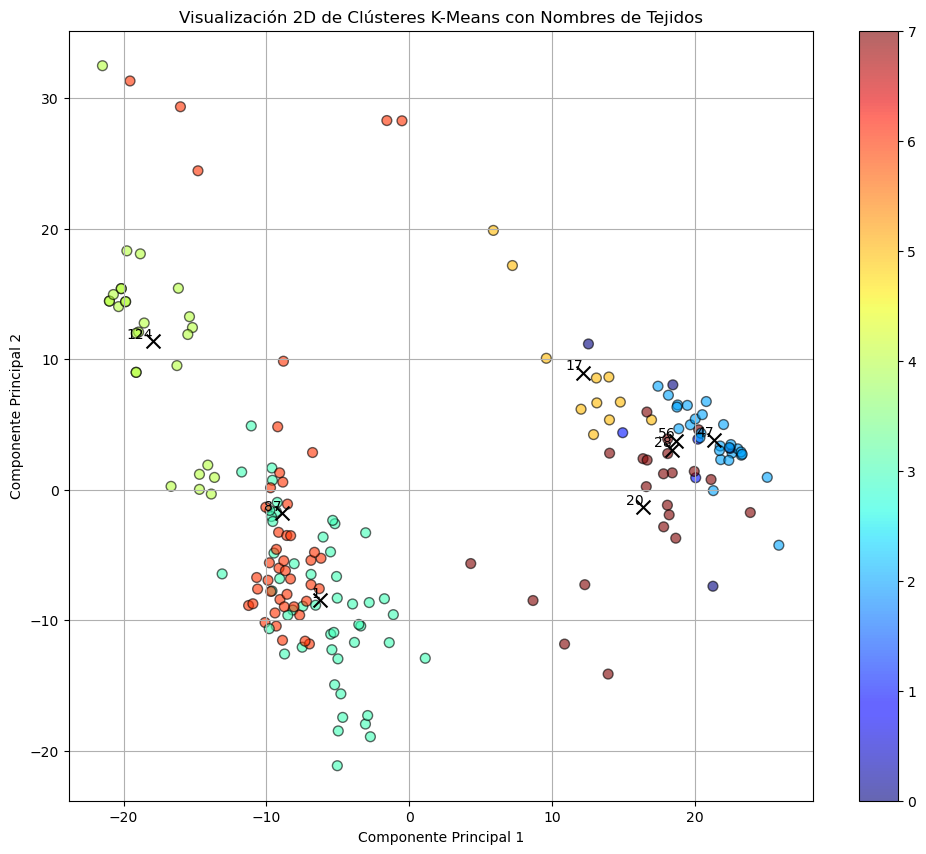

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Aplicar PCA para reducir a 2 componentes
pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(data_pca)

# Obtener clústeres usando tu implementación de K-Means
centroides_2d = np.array([data_pca_2d[clusters_custom == i].mean(axis=0) for i in range(8)])

# Asignar cada muestra a su tejido correspondiente
clase = classes.reset_index().rename(columns={"index": "Tissue", 0: "Cluster"})
clase["Cluster_assigned"] = clusters_custom

# Determinar el tejido predominante en cada cluster
predominant_tissues = [clase[clase['Cluster_assigned'] == i]['Tissue'].value_counts().idxmax() for i in range(8)]

# Crear el gráfico de dispersión 2D
plt.figure(figsize=(12, 10))
scatter = plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=clusters_custom, cmap='jet', marker='o', edgecolor='k', s=50, alpha=0.6)

# Mostrar los centroides con 'x' y etiquetar cada centroide con el tejido predominante
for i, tissue in enumerate(predominant_tissues):
    plt.scatter(centroides_2d[i, 0], centroides_2d[i, 1], c='black', marker='x', s=100)
    plt.text(centroides_2d[i, 0], centroides_2d[i, 1], tissue, fontsize=10, ha='right', va='bottom')

plt.colorbar(scatter)
plt.title('Visualización 2D de Clústeres K-Means con Nombres de Tejidos')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


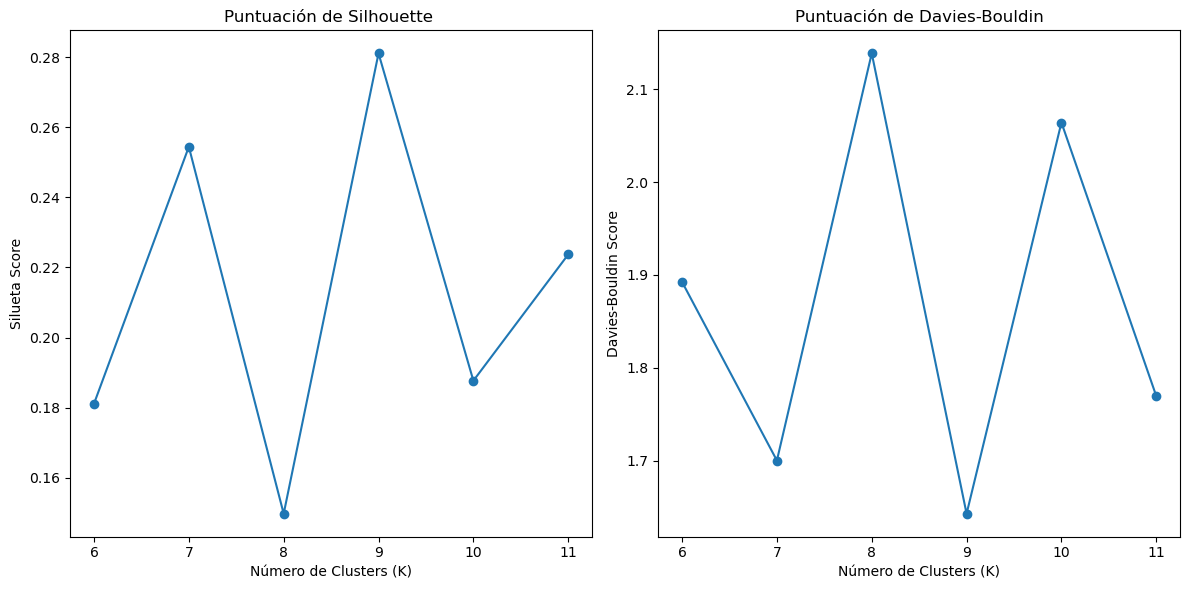

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Cargar dataset_tissue.txt
data_path = '../db/dataset_tissue.txt'
data = pd.read_csv(data_path, sep=',', header=0, index_col=0)

# Cargar clase.txt
classes_path = '../db/clase.txt'
classes = pd.read_csv(classes_path, sep=',', header=0, index_col=0)

# Transponer los datos
data_transposed = data.transpose()

# Normalizar los datos usando MinMaxScaler
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data_transposed),
                               columns=data_transposed.columns,
                               index=data_transposed.index)

# Aplicar PCA para retener el 95% de la varianza
pca_95 = PCA(n_components=0.95)
data_pca = pca_95.fit_transform(data_normalized)

# Evaluando diferentes valores de k
k_values = range(6, 12)  # Evaluando desde 6 hasta 11 clusters

# Inicializar listas para almacenar las métricas
silhouette_scores = []
davies_bouldin_scores = []

for k in k_values:
    # Aplicar tu función kmeans
    centroides_final, clusters_custom = kmeans(data_pca, k, 4.5)
    
    # Calcular las métricas
    silhouette = silhouette_score(data_pca, clusters_custom)
    davies_bouldin = davies_bouldin_score(data_pca, clusters_custom)
    
    # Almacenar las métricas en las listas
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)

# Gráfica de Silueta y Davies-Bouldin
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Puntuación de Silhouette ')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silueta Score')

plt.subplot(1, 2, 2)
plt.plot(k_values, davies_bouldin_scores, marker='o', linestyle='-')
plt.title('Puntuación de Davies-Bouldin')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Davies-Bouldin Score')

plt.tight_layout()
plt.show()


In [39]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calcular Silhouette Score
silhouette_avg = silhouette_score(data_pca, clusters_custom)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Calcular Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(data_pca, clusters_custom)
print(f'Davies-Bouldin Score: {davies_bouldin:.2f}')


Silhouette Score: 0.24
Davies-Bouldin Score: 1.66


In [43]:
import pandas as pd

# Ruta al archivo clase.txt
clases_path = '../db/clase.txt'  # Asegúrate de proporcionar la ruta correcta

# Cargar las etiquetas reales desde el archivo
etiquetas_reales = pd.read_csv(clases_path, sep=',', header=0, index_col=0)

# Mostrar las etiquetas reales
print(etiquetas_reales)


            x
1      kidney
2      kidney
3      kidney
4      kidney
5      kidney
..        ...
185  placenta
186  placenta
187  placenta
188  placenta
189  placenta

[189 rows x 1 columns]


In [46]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, homogeneity_score, completeness_score

# Calcular Silhouette Score
silhouette_avg = silhouette_score(data_pca, clusters_custom)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Calcular Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(data_pca, clusters_custom)
print(f'Davies-Bouldin Score: {davies_bouldin:.2f}')

# Supongamos que tienes las etiquetas reales de clase en 'etiquetas_reales'
#etiquetas_reales = [...]  # Reemplaza con tus etiquetas reales de clase
etiquetas_reales_df = pd.read_csv(clases_path, sep=',', header=0, index_col=0)
etiquetas_reales = etiquetas_reales_df.values.flatten()

# Calcular Homogeneidad y Completitud
homogeneity = homogeneity_score(etiquetas_reales, clusters_custom)
completeness = completeness_score(etiquetas_reales, clusters_custom)

print(f'Homogeneidad: {homogeneity:.2f}')
print(f'Completitud: {completeness:.2f}')


Silhouette Score: 0.22
Davies-Bouldin Score: 1.77
Homogeneidad: 0.88
Completitud: 0.72


c:\Users\Omar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


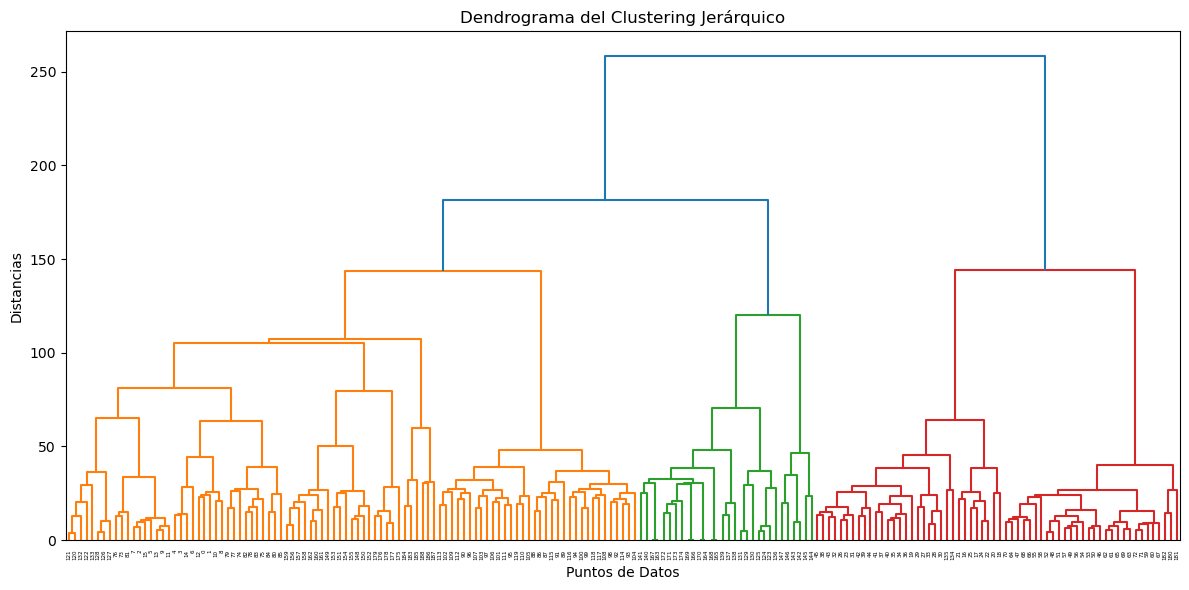

In [40]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Cargar dataset_tissue.txt
data_path = '../db/dataset_tissue.txt'
data = pd.read_csv(data_path, sep=',', header=0, index_col=0)

# Transponer los datos
data_transposed = data.transpose()

# Normalizar los datos usando MinMaxScaler
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data_transposed),
                               columns=data_transposed.columns,
                               index=data_transposed.index)

# Aplicar PCA para retener el 95% de la varianza
pca_95 = PCA(n_components=0.95)
data_pca = pca_95.fit_transform(data_normalized)

# Define el número de clústeres deseado
k = 5  # Puedes ajustar esto según tu preferencia

# Crea un modelo de Clustering Jerárquico Aglomerativo (AHC) y ajústalo a tus datos reducidos
model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
model.fit(data_pca)

# Calcula la matriz de enlace (Z) usando SciPy
Z = linkage(data_pca, 'ward')

# Visualiza el dendrograma
plt.figure(figsize=(12, 6))
dendrogram(Z,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Puntos de Datos')
plt.xticks(fontsize=4)
plt.ylabel('Distancias')
plt.tight_layout()
plt.show()